# Creating model

In [1]:
from keras import layers
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [2]:
model = VGG16(include_top=False, input_shape=(224,224,3))

In [3]:
for layer in model.layers:
    layer.trainable = False

In [4]:
flatened_layer = layers.Flatten()(model.output)
fc_layer =layers.Dense(512, activation="relu")(flatened_layer)
output_layer = layers.Dense(1, activation="sigmoid")(fc_layer)

In [5]:
model = Model(inputs=model.input, outputs=output_layer)

model compile

In [6]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate= 1e-4), metrics="accuracy")


In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

data geeration

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
train_directory = "../datasets/catdog/train/"
validation_directory = "../datasets/catdog/validation/"

In [10]:
train_datagen_x = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

validation_datagen_x = ImageDataGenerator(rescale= 1./255)

In [11]:
train_generator_x = train_datagen_x.flow_from_directory(
    train_directory,
    target_size=(224,224),
    batch_size=16,
    class_mode="binary"
)

validation_genarator_x = validation_datagen_x.flow_from_directory(
    validation_directory,
    target_size=(224,224),
    batch_size=16,
    class_mode="binary"
)

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


training

In [12]:
history = model.fit(train_generator_x, epochs=30, validation_data=validation_genarator_x )

Epoch 1/30
125/125 [==============================] - 102s 738ms/step - loss: 0.7708 - accuracy: 0.6033 - val_loss: 0.3837 - val_accuracy: 0.8330
Epoch 2/30
125/125 [==============================] - 113s 906ms/step - loss: 0.5799 - accuracy: 0.7029 - val_loss: 0.5510 - val_accuracy: 0.7200
Epoch 3/30
125/125 [==============================] - 62s 492ms/step - loss: 0.5332 - accuracy: 0.7379 - val_loss: 0.3797 - val_accuracy: 0.8270
Epoch 4/30
125/125 [==============================] - 121s 969ms/step - loss: 0.5101 - accuracy: 0.7484 - val_loss: 0.3791 - val_accuracy: 0.8260
Epoch 5/30
125/125 [==============================] - 178s 1s/step - loss: 0.4799 - accuracy: 0.7664 - val_loss: 0.2877 - val_accuracy: 0.8630
Epoch 6/30
125/125 [==============================] - 178s 1s/step - loss: 0.4774 - accuracy: 0.7739 - val_loss: 0.2657 - val_accuracy: 0.8680
Epoch 7/30
125/125 [==============================] - 168s 1s/step - loss: 0.4586 - accuracy: 0.7924 - val_loss: 0.2683 - val_accur

visualization

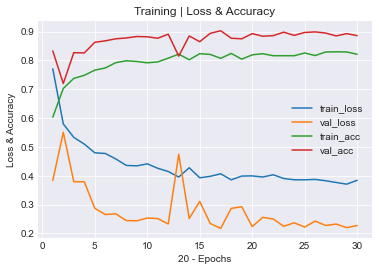

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure()

epochs = 31
plt.plot(np.arange(1, epochs), history.history["loss"], label = "train_loss")
plt.plot(np.arange(1, epochs), history.history["val_loss"], label = "val_loss")

plt.plot(np.arange(1, epochs), history.history["accuracy"], label = "train_acc")
plt.plot(np.arange(1, epochs), history.history["val_accuracy"], label = "val_acc")

plt.title("Training | Loss & Accuracy")
plt.xlabel("20 - Epochs")
plt.ylabel("Loss & Accuracy")
plt.legend()
plt.show()

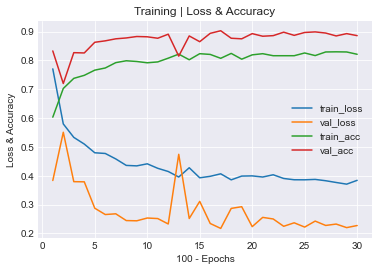

In [19]:


plt.style.use('seaborn-darkgrid')
plt.figure()

epochs = 31

plt.plot(np.arange(1, epochs), history.history["loss"], label = "train_loss")
plt.plot(np.arange(1, epochs), history.history["val_loss"], label = "val_loss")

plt.plot(np.arange(1, epochs), history.history["accuracy"], label = "train_acc")
plt.plot(np.arange(1, epochs), history.history["val_accuracy"], label = "val_acc")

plt.title("Training | Loss & Accuracy")
plt.xlabel("100 - Epochs")
plt.ylabel("Loss & Accuracy")
plt.legend()
plt.show()

In [20]:
model.save("cat_dog_last.h5")

Prediction

In [28]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

In [29]:
model_path = "./cat_dog_last.h5"
image_path = "../datasets/catdog/test/cats/1513.jpg"

In [39]:
prediction_model = load_model(model_path)
test_img = load_img(image_path, target_size=(224,224))

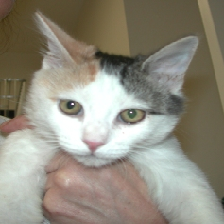

In [40]:
test_img

In [41]:
print(test_img)

<PIL.Image.Image image mode=RGB size=224x224 at 0x1F29256EDF0>


In [42]:
test_img = img_to_array(test_img)
test_img.shape

(224, 224, 3)

In [43]:
test_img = np.expand_dims(test_img, axis=0)
test_img.shape

(1, 224, 224, 3)

In [44]:
train_generator_x.class_indices

{'cats': 0, 'dogs': 1}

In [45]:
result = prediction_model.predict(test_img)
result

1/1 [==============================] - 3s 3s/step


array([[0.]], dtype=float32)

In [46]:
if result[0,0] > 0.5:
    label = "Dog"
    print(label)
else:
    label = "Cat"
    print(label)

Cat


In [47]:
import cv2

test_img = cv2.imread(image_path)
cv2.putText(test_img, label, (20,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)
cv2.imshow("Prediction", test_img)

cv2.waitKey(5000)
cv2.destroyAllWindows()